In [7]:
!pip freeze > requirements.txt

In [8]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import seaborn as sns
import skimage as ski
from skimage.color import rgb2gray
from skimage.feature import hog
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_validate

In [9]:
xgboost_params = {"learning_rate": [0.1],
                  "max_depth": [4,5,6],
                  "n_estimators": [50,60,70],
                  "colsample_bytree": [0.5],
                  "objective": ['multi:softmax'],
                  "num_class":[8]}

lightgbm_params = {"learning_rate": [0.01,0.1],
                   "n_estimators": [400,500],
                   "colsample_bytree": [0.7, 1]}



# classifiers = [('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgboost_params),
#                ('LightGBM', LGBMClassifier(verbose = -1), lightgbm_params)]




knn_params = {"n_neighbors": range(2, 50)}

cart_params = {'max_depth': [2],
               "min_samples_split": [19,20]}

rf_params = {"max_depth": [10, 11, None],
             "max_features": [7, 8, "sqrt"],
             "min_samples_split": [17,18,19],
             "n_estimators": [220,230,240]}
             
classifiers = [('KNN', KNeighborsClassifier(), knn_params),
               ("CART", DecisionTreeClassifier(), cart_params),
               ("RF", RandomForestClassifier(max_features='sqrt'), rf_params),
               ]

In [10]:
paths = ['battery', 'dc_volt_src', 'diode', 'gnd', 'inductor', 'resistor','voltmeter']
data_images =[]
categories = []
for path in paths:
    for i in range(1, 201):
        try:
            image = ski.io.imread(f'{path}/{i}.bmp')
            data = hog(image,pixels_per_cell=(8,8))
            print(data.shape)
            data_images.append(data)
            categories.append(path)
        except FileNotFoundError:
            print(f"Dosya bulunamadı: {path}/{i}.bmp. Atlanıyor.")
            continue
        except ValueError:
            print("Dosya kanal sayisi fazla")
            image = ski.io.imread(f'{path}/{i}.bmp')
            data = rgb2gray(image)
            data = hog(data,pixels_per_cell=(8,8))
            data_images.append(data)
            categories.append(path)
            continue

(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(13689,)
(

In [11]:
def hyperparameter_optimization(X, y, cv=3, scoring="accuracy"):
    """
    Grid search ile daha önce belirlenen parametreler ile hiperparametre optimizasyonu yapılıyor.
    """
    print("Hyperparameter Optimization....")
    best_models = {}
    for name, classifier, params in classifiers:
        print(f"########## {name} ##########")
        cv_results = cross_validate(classifier, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")

        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X, y)
        final_model = classifier.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (After): {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models

In [12]:
X = data_images
y = categories
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=46)

In [13]:
hyperparameter_optimization(X,y)

Hyperparameter Optimization....
########## KNN ##########
accuracy (Before): 0.8327
accuracy (After): 0.8488
KNN best params: {'n_neighbors': 3}

########## CART ##########
accuracy (Before): 0.5722
accuracy (After): 0.2759
CART best params: {'max_depth': 2, 'min_samples_split': 19}

########## RF ##########
accuracy (Before): 0.8276
accuracy (After): 0.818
RF best params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 17, 'n_estimators': 220}



{'KNN': KNeighborsClassifier(n_neighbors=3),
 'CART': DecisionTreeClassifier(max_depth=2, min_samples_split=19),
 'RF': RandomForestClassifier(min_samples_split=17, n_estimators=220)}

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)

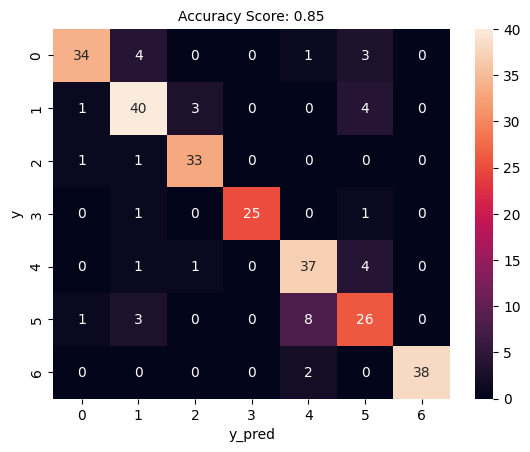

              precision    recall  f1-score   support

     battery       0.92      0.81      0.86        42
 dc_volt_src       0.80      0.83      0.82        48
       diode       0.89      0.94      0.92        35
         gnd       1.00      0.93      0.96        27
    inductor       0.77      0.86      0.81        43
    resistor       0.68      0.68      0.68        38
   voltmeter       1.00      0.95      0.97        40

    accuracy                           0.85       273
   macro avg       0.87      0.86      0.86       273
weighted avg       0.86      0.85      0.85       273



In [15]:
def plot_confusion_matrix(y_test, y_pred):
    acc = round(metrics.accuracy_score(y_test, y_pred), 2)
    cm = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

plot_confusion_matrix(y_test, y_pred)

print(metrics.classification_report(y_test, y_pred))